<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

In [38]:
import pandas as pd
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# đọc file csv
df = pd.read_csv('Data/train.csv')

# drop Unnamed:
df = df.drop(['Unnamed: 0'], axis=1)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,"#mindfulness - Soft Rain for Mindful Meditation, Stress Relief Relaxation Music",Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,"#mindfulness - Soft Rain for Mindful Meditation, Stress Relief Relaxation Music",Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


- ## **Có bao nhiêu hàng và bao nhiêu cột?**

In [39]:
# số lượng dòng và cột
df.shape

(114000, 20)

- ## **Ý nghĩa của từng hàng là gì?**

- **Thông tin của một bài hát**

- ## **Có hàng trùng lặp không?**

In [40]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()

print("- Data có {} dòng trùng nhau".format(duplicates))

- Data có 450 dòng trùng nhau


- ## **Ý nghĩa của từng cột là gì?**

- 1. **track_id**: Id của bản nhạc. 
- 2. **artists**: Tên của nghệ sĩ được liên kết với bản nhạc.
- 3. **album_name**: Tên album chứa bản nhạc.
- 4. **track_name**: Tên của bản nhạc.
- 5. **popularity**: Điểm phổ biến của bài hát trên Spotify dao động từ 0 đến 100..
- 6. **duration_ms**: Thời lượng của bản nhạc tính bằng mili giây.
- 7. **explicit**: Giá trị boolean cho biết bản nhạc có chứa nội dung phản cảm hay không.
- 8. **danceability**: Điểm từ 0 đến 1 thể hiện mức độ phù hợp của một bản nhạc để khiêu vũ dựa trên nhiều yếu tố âm nhạc khác nhau.
- 9. **energy**: Thước đo cường độ và hoạt động của một bản nhạc, nằm trong khoảng từ 0 đến 1.
- 10. **key**: Khóa của bản nhạc được biểu thị bằng một giá trị nguyên.
- 11. **loudness**: Độ ồn của bản nhạc tính bằng decibel (dB).
- 12. **mode**: Chế độ âm của bản nhạc, được biểu thị bằng một giá trị nguyên (0 cho âm thứ, 1 cho âm trưởng).
- 13. **speechiness**: Điểm nằm trong khoảng từ 0 đến 1 thể hiện sự hiện diện của các từ được nói trong một bản nhạc.
- 14. **acousticness**: Điểm từ 0 đến 1 thể hiện mức độ chất lượng âm thanh của bản nhạc.
- 15. **instrumentalness**: Điểm nằm trong khoảng từ 0 đến 1 thể hiện khả năng một bản nhạc trở thành nhạc cụ.
- 16. **liveness**: Điểm từ 0 đến 1 thể hiện sự hiện diện của khán giả trong quá trình ghi hoặc biểu diễn một bản nhạc.
- 17. **valence**: Điểm từ 0 đến 1 thể hiện tính tích cực về mặt âm nhạc mà một bản nhạc truyền tải.
- 18. **tempo**: Nhịp độ của bản nhạc tính bằng nhịp mỗi phút (BPM).
- 19. **time_signature**: Số nhịp trong mỗi ô nhịp của bản nhạc.
- 20. **track_genre**: Thể loại của bản nhạc.


- ## **Loại dữ liệu hiện tại của mỗi cột là gì?**


In [41]:
# Checking the data types of each column
data_types = df.dtypes
data_types

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

- ## **Có cột nào có kiểu dữ liệu không phù hợp không?**

In [42]:
# Check dữ liệu có hợp lệ hay không

inappropriate_data_types = {}
for column, dtype in data_types.items():
    if "id" in column and dtype != 'object':
        inappropriate_data_types[column] = dtype
    elif "date" in column and dtype != 'datetime64[ns]':
        inappropriate_data_types[column] = dtype
    elif "popularity" in column and dtype != 'float' and dtype != 'int':
        inappropriate_data_types[column] = dtype
    elif "explicit" in column and dtype != 'bool':
        inappropriate_data_types[column] = dtype

# nếu có dữ liệu sai thì in ra thông báo
if len(inappropriate_data_types) == 0:
    print("Tất cả dữ liệu đều hợp lệ")
else:
    print("Có dữ liệu không hợp lệ:")
    print(inappropriate_data_types)

Tất cả dữ liệu đều hợp lệ


- ## **Với mỗi cột số, các giá trị được phân bổ như thế nào?**

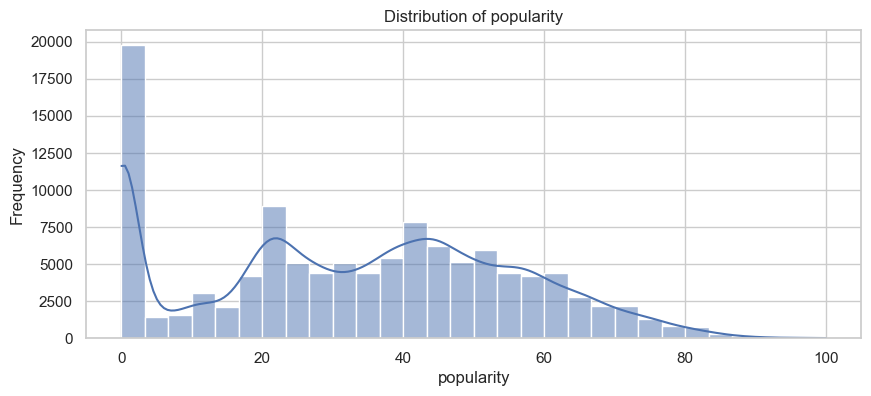

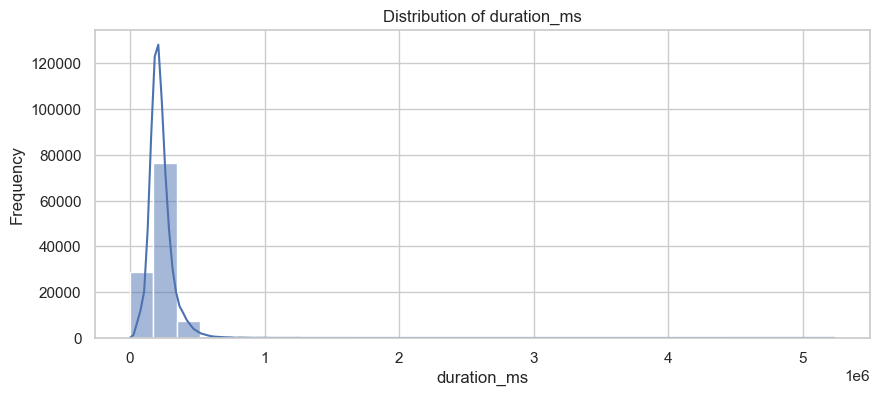

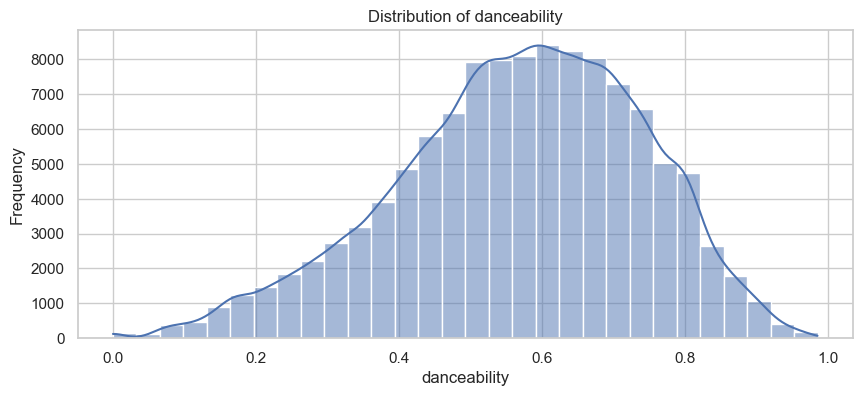

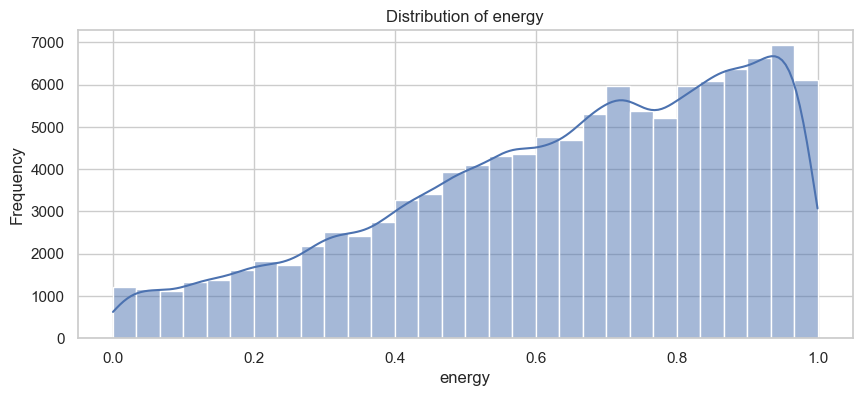

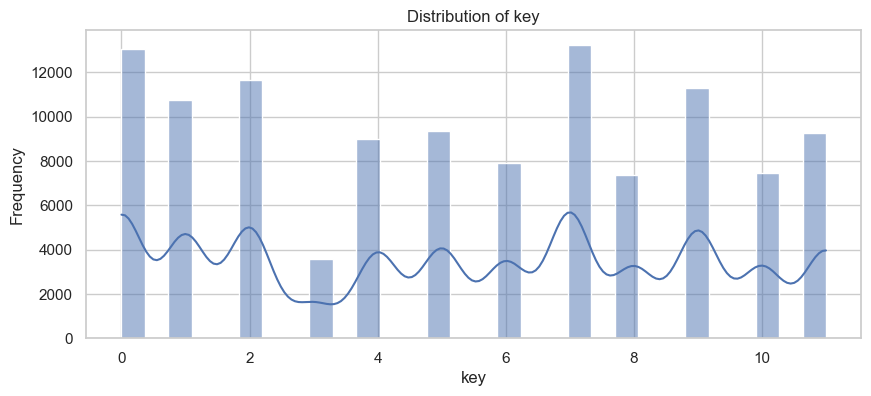

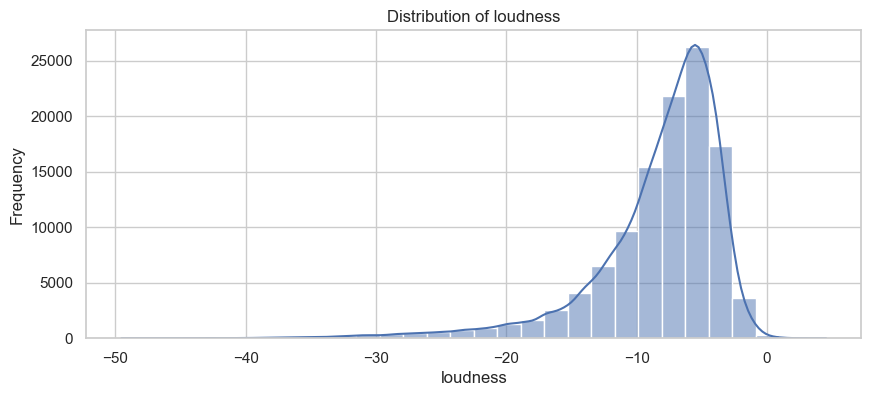

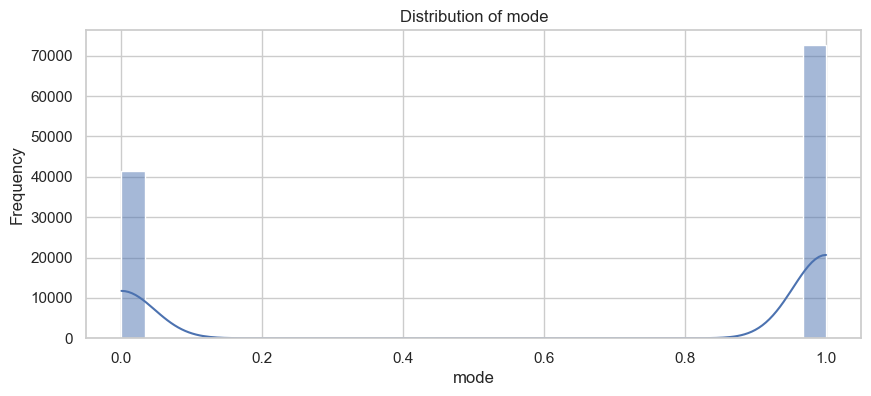

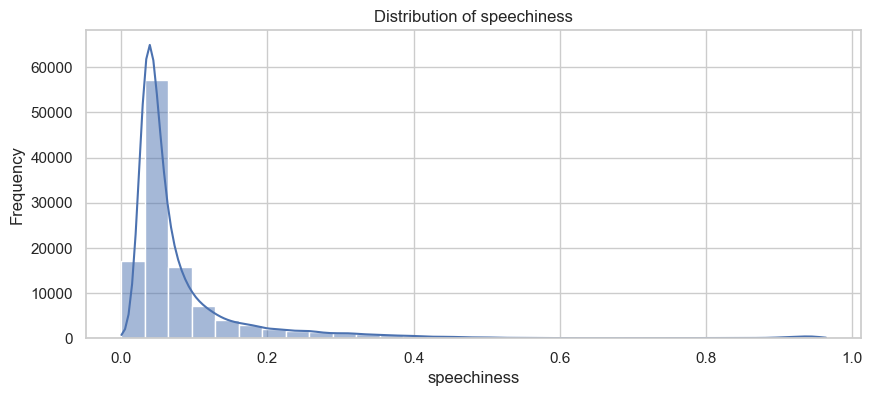

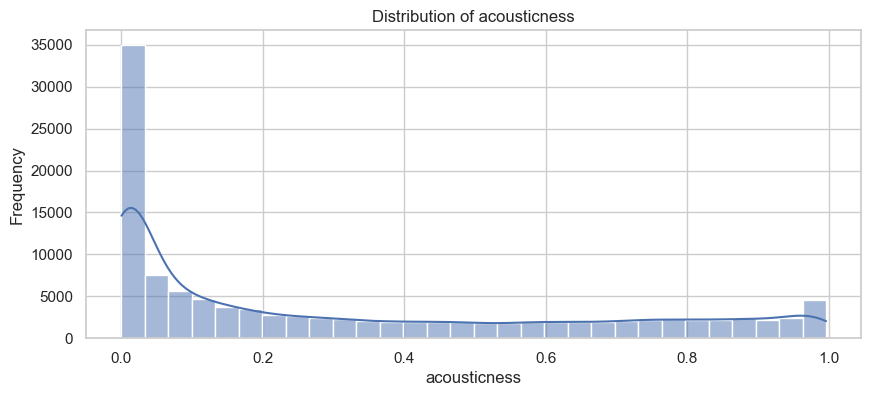

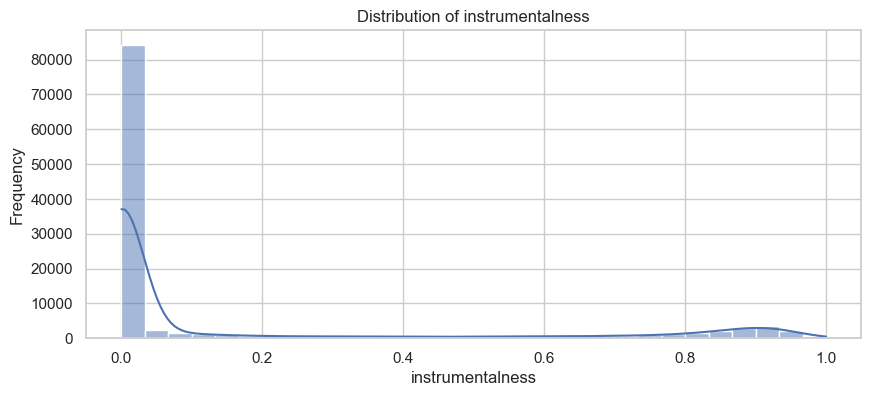

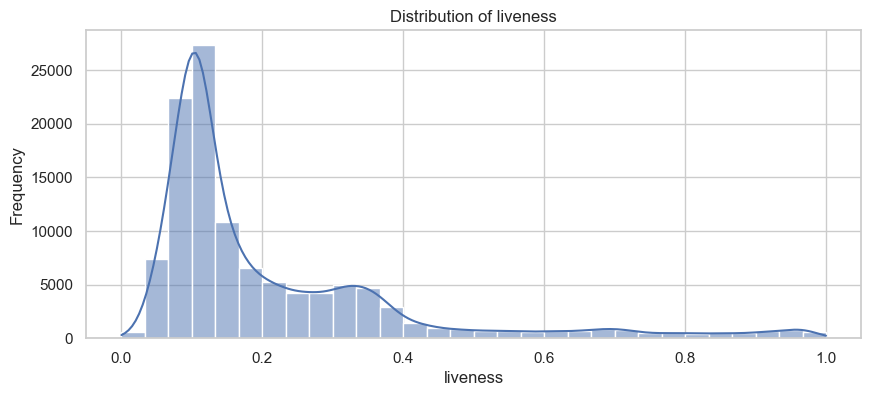

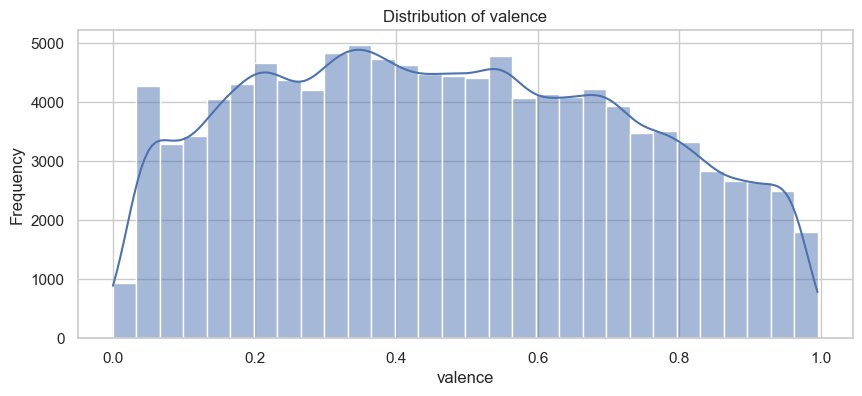

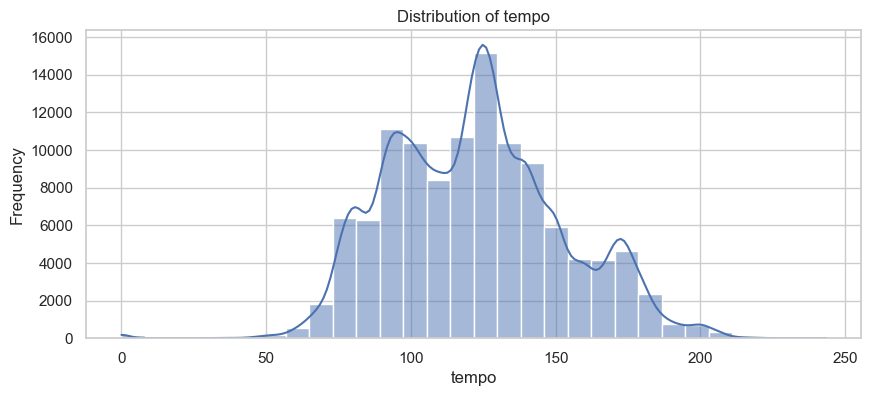

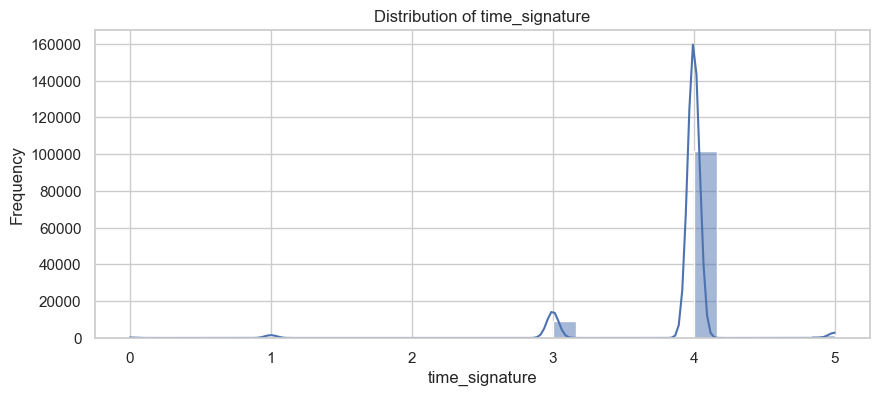

In [43]:
# Setting the plot style
sns.set(style="whitegrid")
# lọc ra các cột numerical
numerical_columns = df.select_dtypes(include=['number'])
# Plotting distributions
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Đối với các cột có kiểu dữ liệu số sẽ tính:
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

In [44]:
# Hàm tính missing_ratio (tỷ lệ thiếu)
def missing_ratio(x):
    return (x.isnull().mean() * 100)

# Hàm tính lower quartile (phân vị 25)
def lower_quartile(x):
    return x.quantile(0.25)

# Hàm tính median (phân vị 50)
def median(x):
    return x.quantile(0.5)

# Hàm tính upper quartile (phân vị 75)
def upper_quartile(x):
    return x.quantile(0.75)

num_col_info_df = numerical_columns.agg(["min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df = num_col_info_df.round(1)
num_col_info_df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
min,0.0,0.0,0.0,0.0,0.0,-49.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,17.0,174066.0,0.5,0.5,2.0,-10.0,0.0,0.0,0.0,0.0,0.1,0.3,99.2,4.0
median,35.0,212906.0,0.6,0.7,5.0,-7.0,1.0,0.0,0.2,0.0,0.1,0.5,122.0,4.0
upper_quartile,50.0,261506.0,0.7,0.9,8.0,-5.0,1.0,0.1,0.6,0.0,0.3,0.7,140.1,4.0
max,100.0,5237295.0,1.0,1.0,11.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,243.4,5.0


- **Tỷ lệ phần trăm của các giá trị bị thiếu là bao nhiêu?**

In [45]:
# tính phần trăm dữ liệu thiếu
missing_values_percentage_df = numerical_columns.agg([missing_ratio])
missing_values_percentage_df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df.shape

(114000, 20)

- ## **Với mỗi cột phân loại, các giá trị được phân bổ như thế nào?**

In [47]:
# lọc ra các cột categorical
categorical_columns = df.select_dtypes(exclude=['number'])

In [48]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [49]:
# Hàm để tính tỷ lệ còn thiếu
def missing_ratio(x):
    return (x.isnull().mean() * 100)

# Hàm để tính số lượng giá trị duy nhất (đếm các giá trị không thiếu)
def num_values(x):
    return len(x.dropna().unique())

# Hàm để tính các tỷ lệ giá trị
def value_ratios(x):
    # Tạo một Series với tỷ lệ xuất hiện của từng giá trị
    value_counts = x.value_counts(normalize=True)

    # Sắp xếp theo tỷ lệ giảm dần
    sorted_value_counts = value_counts.sort_values(ascending=False)
    
    # Lưu vào từ điển
    value_ratios = {value: round(percentage * 100,1) for value, percentage in sorted_value_counts.items()}
    
    return value_ratios

# Gán DataFrame mới để lưu kết quả
cat_col_info_df = categorical_columns.agg([num_values, value_ratios])
cat_col_info_df

,track_id,artists,album_name,track_name,explicit,track_genre
num_values,89741,31437,46589,73608,2,114
value_ratios,"{'6S3JlDAGk3uu3NtZbPnuhS': 0.0, '2kkvB3RNRzwjFdGhaUA0tz': 0.0, '2Ey6v4Sekh3Z0RUSISRosD': 0.0, '4...","{'The Beatles': 0.2, 'George Jones': 0.2, 'Stevie Wonder': 0.2, 'Linkin Park': 0.2, 'Ella Fitzge...","{'Alternative Christmas 2022': 0.2, 'Feliz Cumpleaños con Perreo': 0.2, 'Metal': 0.1, 'Halloween...","{'Run Rudolph Run': 0.1, 'Halloween': 0.1, 'Frosty The Snowman': 0.1, 'Little Saint Nick - 1991 ...","{False: 91.5, True: 8.6}","{'acoustic': 0.9, 'drum-and-bass': 0.9, 'alternative': 0.9, 'ambient': 0.9, 'anime': 0.9, 'black..."


- **Tỷ lệ phần trăm của các giá trị bị thiếu là bao nhiêu?**

In [50]:
# tính phần trăm dữ liệu thiếu
missing_values_categorical_df = categorical_columns.agg([missing_ratio])
missing_values_categorical_df

,track_id,artists,album_name,track_name,explicit,track_genre
missing_ratio,0.0,0.000877,0.000877,0.000877,0.0,0.0


- **Có bao nhiêu giá trị khác nhau? Hiển thị một số**

In [51]:
# Đếm số lượng giá trị duy nhất trong mỗi cột
unique_values_count = {}
examples_of_values = {}
for column in categorical_columns:
    unique_values = categorical_columns[column].nunique()
    unique_values_count[column] = unique_values
    examples_of_values[column] = categorical_columns[column].unique()

pd.DataFrame.from_dict(unique_values_count, orient='index', columns=['Unique Values Count'])

,Unique Values Count
track_id,89741
artists,31437
album_name,46589
track_name,73608
explicit,2
track_genre,114


In [52]:
# in ra các giá trị duy nhất trong mỗi cột tượng trưng cho cột đó
unique_values_examples = {column: df[column].unique()[:5] for column in categorical_columns}
unique_values_examples

{'track_id': array(['5SuOikwiRyPMVoIQDJUgSV', '4qPNDBW1i3p13qLCt0Ki3A',
        '1iJBSr7s7jYXzM8EGcbK5b', '6lfxq3CG4xtTiEg7opyCyx',
        '5vjLSffimiIP26QG5WcN2K'], dtype=object),
 'artists': array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN',
        'Kina Grannis', 'Chord Overstreet'], dtype=object),
 'album_name': array(['Comedy', 'Ghost (Acoustic)', 'To Begin Again',
        'Crazy Rich Asians (Original Motion Picture Soundtrack)',
        'Hold On'], dtype=object),
 'track_name': array(['Comedy', 'Ghost - Acoustic', 'To Begin Again',
        "Can't Help Falling In Love", 'Hold On'], dtype=object),
 'explicit': array([False,  True]),
 'track_genre': array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient'],
       dtype=object)}

In [53]:
print(f"- Tổng các cột (các loại dữ liệu có thể khai thác): {df.shape[1]}")
df.dtypes

- Tổng các cột (các loại dữ liệu có thể khai thác): 20


track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [54]:
df.shape

(114000, 20)

In [55]:
# lưu vào kq.csv
df.to_csv('Data/preproces_data.csv', index=False)